<a href="https://colab.research.google.com/github/Abhikhomane45/AbhiPortfolio/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
np.random.seed(0)  # for same output every time
data = np.random.randint(0, 90, size=(20, 2))  # 20 points with 2 features
print(data)

[[44 47]
 [64 67]
 [67  9]
 [83 21]
 [36 87]
 [70 88]
 [88 12]
 [58 65]
 [39 87]
 [46 88]
 [81 37]
 [25 77]
 [72  9]
 [20 80]
 [69 79]
 [47 64]
 [82 88]
 [49 29]
 [19 19]
 [14 39]]


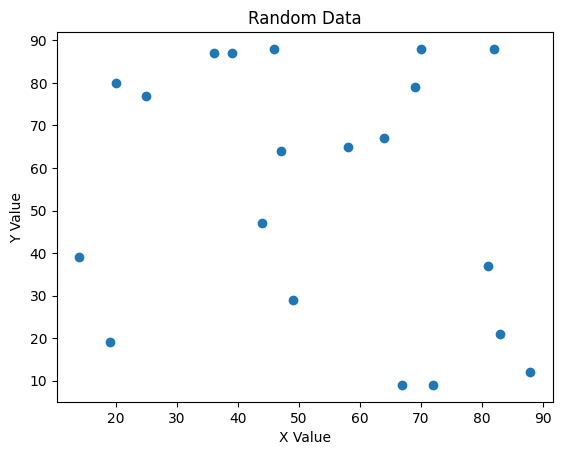

In [17]:
plt.scatter(data[:,0],data[:,1])
plt.title("Random Data")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.show()

In [20]:
# eps = distance between points to be considered neighbors
# min_samples = minimum number of neighbors to form a cluster
db = DBSCAN(eps=5, min_samples=2).fit(data)

# Get cluster labels (-1 means noise/outlier)
labels = db.labels_
print("Cluster labels:", labels)


Cluster labels: [-1 -1  0 -1  1 -1 -1 -1  1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1]


In [21]:
df = pd.DataFrame(data, columns=['X', 'Y'])
df['Cluster'] = labels
print(df)


     X   Y  Cluster
0   44  47       -1
1   64  67       -1
2   67   9        0
3   83  21       -1
4   36  87        1
5   70  88       -1
6   88  12       -1
7   58  65       -1
8   39  87        1
9   46  88       -1
10  81  37       -1
11  25  77       -1
12  72   9        0
13  20  80       -1
14  69  79       -1
15  47  64       -1
16  82  88       -1
17  49  29       -1
18  19  19       -1
19  14  39       -1


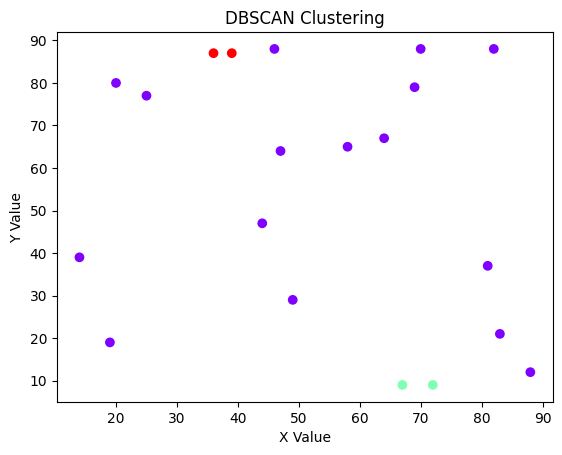

In [22]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.show()


In [25]:
import numpy as np
import pandas as pd

# Generate random data (10 rows, 2 columns)
data = np.random.randint(0, 50, size=(10, 2))

# Create DataFrame
df = pd.DataFrame(data, columns=['c1', 'c2'])
df


,c1,c2
0,32,1
1,9,32
2,31,10
3,23,35
4,11,28
5,34,0
6,0,36
7,5,38
8,40,17
9,15,4


In [26]:
from sklearn.cluster import DBSCAN

# Create model → choose eps & min_samples
db = DBSCAN(eps=5, min_samples=2)

# Fit and predict cluster labels
labels = db.fit_predict(df[['c1', 'c2']])

# Add labels to DataFrame
df['cluster'] = labels
print(df)


   c1  c2  cluster
0  32   1        0
1   9  32        1
2  31  10       -1
3  23  35       -1
4  11  28        1
5  34   0        0
6   0  36       -1
7   5  38       -1
8  40  17       -1
9  15   4       -1


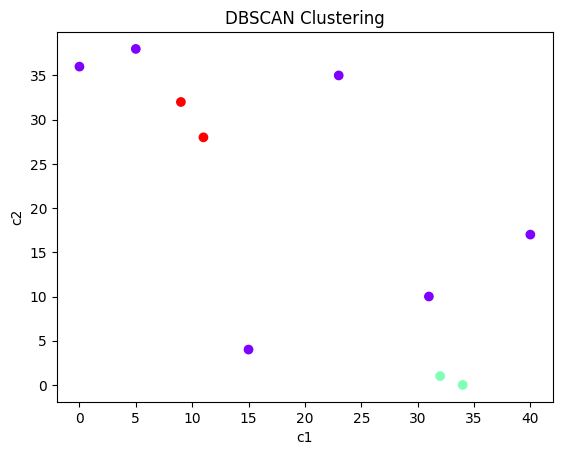

In [27]:
import matplotlib.pyplot as plt

plt.scatter(df['c1'], df['c2'], c=df['cluster'], cmap='rainbow')
plt.xlabel('c1')
plt.ylabel('c2')
plt.title('DBSCAN Clustering')
plt.show()


K MEANS CLUSTER

In [31]:
from sklearn.cluster import KMeans

# Choose number of clusters (k)
k = 2  # change to 2/3/4 and see the difference

km = KMeans(n_clusters=k, random_state=42)
k_labels = km.fit_predict(df[['c1','c2']])

# Add to DataFrame
df['kmeans'] = k_labels
df.head()


,c1,c2,cluster,kmeans
0,32,1,0,1
1,9,32,1,0
2,31,10,-1,1
3,23,35,-1,0
4,11,28,1,0


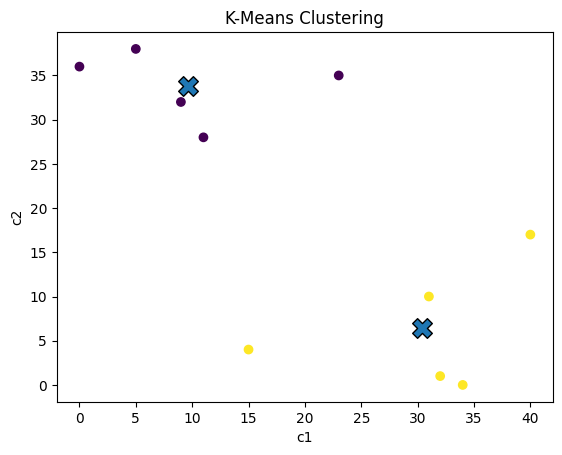

Cluster centers (c1, c2):
 [[ 9.6 33.8]
 [30.4  6.4]]


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# scatter of points colored by K-Means labels
plt.scatter(df['c1'], df['c2'], c=df['kmeans'])
# plot centroids
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, edgecolor='k')

plt.xlabel('c1'); plt.ylabel('c2'); plt.title('K-Means Clustering')
plt.show()

print("Cluster centers (c1, c2):\n", centers)

